# 어린 왕자

최근 빅데이터 분석 기법이 많이 사용되는 있는 분야는 텍스트 분석 또는 텍스트 마이닝(Text Mining)이다.  텍스트 마이닝은 문자로 구성된 빅데이터에서 의미있는 결과를 찾아내는 분석 기법으로 최근에는 사회연결망에서 생산되는 비정형 자료를 이용하여 다양한 분석을 시도하고 있다. 

파이썬 언어의 데이터 처리를 알아보는 간단한 에제로서 생떽쥐베리의 유명한 소설 **어린 왕자** 이용하려고 한다. 텍스트 화일의 내용을 문자열로 읽고 데이터프레임으로 전환하여 장(chapter)별로 문자열 `어린 왕자` 가 나타나는 빈도수를 계산할 것이다.

## 필요한 라이브러리 

분석 결과를 이용하여 그림을 그리려면 다음과 같은 여러 개의 라이브러리를 불러와야 한다. 아래 라이브러리의 의미와 그림을 잘 그리기 위한 다양한 기능들은 뒤에서 자세하게 다룰 것이므로 이 예제에서는 일단 실행해보자.

`numpy` 는 선형 대수 등 고급 수학에 관련된 함수들을 제공하는 라이브러리이며 아래 명령문과 같이 `np` 의 이름으로 사용할 수 있다.  

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
import numpy as np
import pandas as pd

# 텍스트 화일 읽기

소설 `어린 왕자`의 내용이 저장된 화일은 `little-prince.txt` 이다. 이 텍스트 화일에 있는 모든 문자를 차례대로 읽어서 하나의 문자열에 저장하는 
작업은 다음 코드가 수행한다. 결과는 변수 `little_prince` 에 저장된다. 

In [3]:
# Colab 을 사용하는 경우 실행 
import base64
import requests
url_data ="https://ilovedata.github.io/teaching/bigdata2/data/little-prince.txt"
little_prince = requests.get(url_data)
little_prince = little_prince.text

# 개인용 PC에서 Jupyter Notebookdmf 사용하는 경우 저장된 화일을 읽는 경우 실행 
# with open('/Users/ylee19067/Dropbox/project/teaching/bigdata/textbook/book/data/little-prince.txt') as f:
#    little_prince = f.read()

In [4]:
little_prince[1:1000]

'  \r\n   어린 왕자\r\n   영어동화 (우리말 해석)\r\n   생텍쥐페리\r\n   \r\n   \r\n   헌사(받치는 글)\r\n   레옹 베르트에게\r\n   \r\n   먼저 이 글을 어린이들이 아닌 어른들에게 바치는 것에 대해 사과할까 한다. 심심한 사과의 말을 전한다. 하지만 이들 어른들은 세상에서 가장 좋은 친구다. 물론 이 발언에 대해서도 심심한 사과의 말을 전하는 바이다. 이들 어른들은 모든 걸 이해할 수 있다, 심지어 어린이들의 책까지. 이런 세 번째로 사과의 말을 전하는 바이다. 이들 어른들은 프랑스에만 해도 굶 주림과 추위에 살고 있다. 그에겐 아늑함이 필요한 것도 사실이다. 내 사과들이 충분하든 아니든, 난 이 책을 어른이 된 어린이들에게 바치는 바이다. 모든 어른도 출발은 아이들이었다. 하지만 그들 몇몇만 그걸 기억해낼 뿐이다. 그래 내 헌사(받 치는 글)를 다음과 같이 수정할까 한다.\r\n   어린이였을 때의\r\n   레옹 베르트에게\r\n   \r\n   ※ 지금부터는 『어린 왕자』(생텍쥐페리의 동화)를 해석해보겠습니다.\r\n   \r\n   이 동화는 아래 링크의 동화를 우리말로 옮긴 것입니다.\r\n   (번역과정에서 구글 번역기를 이용해 1차로 영어원문으로 만든 다음, 그걸 우리말로 읽을 수 있게 좀 수정하고 다듬은 후, 2차로 우리말로 해석했습니다. 따라서 프랑스어 원문과 다를 수 있습니다. 하지만 성실히 번역했기에 큰 줄거리는 맞다고 생각됩니다. 완전한 해석은 아니라는 점 감안해주시고 읽어주세용~♥ 어린 왕자가 좋아서 해석해본 거예요, 제가 읽으려고요. 그러니 많이 읽어주세요~)\r\n   \r\n   『어린 왕자』(호주의 애들레이드대학교의 인터넷도서관 사이트)(프랑스 원문) ▶ https://ebooks.adelaide.edu.au/s/saint- exupery/antoine_de/le-petit-prince/ (검색 일자 : 2017-12-9)\r\n   \r\n   \r\n   \r\n   Le Pe

In [5]:
type(little_prince)

str

문자열 변수안에 지정된 문자열이 몇 번 나타나는지 세어주는 함수가  `np.char.count()` 이며 첫 번쨰 인자는 문자형의 변수이고 두 번째는 찾고자 하는 문자열이다.

아래 결과를 보면 소설 *어린 왕자* 에서는 `별`이란 단어가 159번 나타나는 것을 일 수 있다. 참고로 결과가 `array(159)` 는 159가 행렬(array) 형식이라는 것이다. 행렬 형식은 뒤에서 자세하게 배울것이다.

In [6]:
np.char.count(little_prince, '별')

array(159)

## 텍스트 나누기 

분석의 목표는 장(chapter)별로 문자열 `어린 왕자` 가 나타나는 빈도수를 계산하는 것이다.

중요한 점은 어떤 논리와 방법을 가지고 하나의 문자열로 구성된 전체 소설을 장별로 나누냐는 것이다. 인간은 글을 읽고 이해할 수 있기 때문에 텍스트을 읽으면서 
장의 시작과 끝을 쉽게 찾아 낼 수 있다. 아마도 여러분이 모든 책을 보고 쉽게 책의 장들을 구별할 수 있는 인공지능 알고리즘을 만들수 있다면 멋진 일이 될것이다.

이제 *어린 왕자* 의 텍스트 화일을 보면 각 장은 다음과 같은 문자열로 시작하는 것을 우리는 알 수 있다. 

    어린 왕자 \n 1장\n

    ..... 

    어린 왕자\n 2장\n

    .....

    어린 왕자\n 3장\n

    ......


운이 좋게도 각 장은 문자열 `어린 왕자\n` 로 시작한다. 물론 책의 내용에도 문자열 `어린 왕자` 가 자주 나오지만 장의 시작에서는 줄을 바꾸는 기능을 가진 특수 문자열 `\n` 과 같이 나온다.
이러한 특성을 이용하여 문자열 `어린 왕자\n`이 나오는 경우 장의 시작으로 판단하고 문자열을 장별로 나누어 보자.

문자를 나누는 함수 `split()` 를 이용하며 나누는 기준이 되는 인자를 `어린 왕자\n` 로 지정한다. 결과는 변수 `little_prince_chapters` 에 저장한다.

먼저 함수 `split()`의 간단한 예제를 보고 소설 *어린 왕자*의 텍스트를 나누어 보자. 

In [7]:
mychar = "폭넓은 교양과 심오한 학문적 이론 및 창의적 전문기술을 지닌 지성인을 기른다. 성실한 근면을 바탕으로 책임과 의무를 다하는 건전한 인격을 갖춘 민주 시민을 기른다."
mychar

'폭넓은 교양과 심오한 학문적 이론 및 창의적 전문기술을 지닌 지성인을 기른다. 성실한 근면을 바탕으로 책임과 의무를 다하는 건전한 인격을 갖춘 민주 시민을 기른다.'

In [8]:
mychar.split("을")

['폭넓은 교양과 심오한 학문적 이론 및 창의적 전문기술',
 ' 지닌 지성인',
 ' 기른다. 성실한 근면',
 ' 바탕으로 책임과 의무를 다하는 건전한 인격',
 ' 갖춘 민주 시민',
 ' 기른다.']

<font color='red'> **주의할 점** </font>

우리가 문자 데이터를 다를 때 사용하는 컴퓨터의 운영체제(애플 MaxOS, Linux, WIndows 10 등)에 따라서 같은 기능을 하는 특수문자열이 다른 경우가 있다.

컴퓨터의 운영체제에 따라 새로운 줄로 바꾸어 주는 특수문자열이 아래와 같이 다를 수 있기 때문에 사용하는 운영체제에 따라서 적절하게 선택해야 한다. 

- `\r` : CR(Carriage Return) 라고 부르며 애플 MaxOS 를 사용할 때 새로운 줄로 바꾸어 주는 특수문자열

- `\n` : LF (Line Feed) → 라고 부르며 애플 MaxOS 또는 Linux 를 사용할 때 새로운 줄로 바꾸어 주는 특수문자열

- `\r\n` : CR + LF 라고 부르며 Windows 10 을 사용할 때 새로운 줄로 바꾸어 주는 특수문자열

**`Colab` 을 사용하여 온라인 교과서에서 문자를 읽어오는 경우 줄을 바꾸어 주는 특수문자열이 `\r\n` 으로 사용되므로 `어린 왕자\n` 대신 `어린 왕자\r\n`를 사용하여 장을 나누어 준다.** 

In [9]:
little_prince_chapters = little_prince.split('어린 왕자\r\n')

In [10]:
little_prince_chapters


['   \r\n   ',
 '   영어동화 (우리말 해석)\r\n   생텍쥐페리\r\n   \r\n   \r\n   헌사(받치는 글)\r\n   레옹 베르트에게\r\n   \r\n   먼저 이 글을 어린이들이 아닌 어른들에게 바치는 것에 대해 사과할까 한다. 심심한 사과의 말을 전한다. 하지만 이들 어른들은 세상에서 가장 좋은 친구다. 물론 이 발언에 대해서도 심심한 사과의 말을 전하는 바이다. 이들 어른들은 모든 걸 이해할 수 있다, 심지어 어린이들의 책까지. 이런 세 번째로 사과의 말을 전하는 바이다. 이들 어른들은 프랑스에만 해도 굶 주림과 추위에 살고 있다. 그에겐 아늑함이 필요한 것도 사실이다. 내 사과들이 충분하든 아니든, 난 이 책을 어른이 된 어린이들에게 바치는 바이다. 모든 어른도 출발은 아이들이었다. 하지만 그들 몇몇만 그걸 기억해낼 뿐이다. 그래 내 헌사(받 치는 글)를 다음과 같이 수정할까 한다.\r\n   어린이였을 때의\r\n   레옹 베르트에게\r\n   \r\n   ※ 지금부터는 『어린 왕자』(생텍쥐페리의 동화)를 해석해보겠습니다.\r\n   \r\n   이 동화는 아래 링크의 동화를 우리말로 옮긴 것입니다.\r\n   (번역과정에서 구글 번역기를 이용해 1차로 영어원문으로 만든 다음, 그걸 우리말로 읽을 수 있게 좀 수정하고 다듬은 후, 2차로 우리말로 해석했습니다. 따라서 프랑스어 원문과 다를 수 있습니다. 하지만 성실히 번역했기에 큰 줄거리는 맞다고 생각됩니다. 완전한 해석은 아니라는 점 감안해주시고 읽어주세용~♥ 어린 왕자가 좋아서 해석해본 거예요, 제가 읽으려고요. 그러니 많이 읽어주세요~)\r\n   \r\n   『어린 왕자』(호주의 애들레이드대학교의 인터넷도서관 사이트)(프랑스 원문) ▶ https://ebooks.adelaide.edu.au/s/saint- exupery/antoine_de/le-petit-prince/ (검색 일자 : 2017-12-9)\r\n   \r\n   \r\n   \r\n   Le Peti

이제 장의 문자열들로 구성된 리스트를 데이터프레임으로 변환하자. 이미 정의된 리스트는 아래와 같이 함수 `pd.DataFrame()` 를 이용하여  데이터프레임 `final` 로 만들 수 있다.

만들어진 데이터프레임 `final` 은 각 장에 해당하는 28개의 행과  문자열을 가지는 1개의 열로 구성된다.

아래 결과에서 참고할 점은 21장과 22장이 잘못 나누어졌음을 알 수 있다. 즉, 우리가 사용한 규칙은 장을 구별하는데 한계가 있음을 보여준다. 우리가 보통 **알고리즘(algorithm)** 이라고 말하는 
계산의 규칙과 절차는 원하는 목적을 완벽하게 달성할 수 없는 경우가 흔히다. 많은 개발자들이 알고리즘을 수정하고 개선하는 작업을 하며 밤을 지새우는 것이 흔한 이유이다.  사실 [정규표현식](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)(regular expression)이라는 문자를 정교하게 다루는 규칙을 사용하면 장을 나누는 것은 그리 어렵지 않으나 이 과목의 범위를 벗어나므로 다루지 않을 것이다. 


In [11]:
final = pd.DataFrame({'chapters': little_prince_chapters})
final

,chapters
0,\r\n
1,영어동화 (우리말 해석)\r\n 생텍쥐페리\r\n \r\n \r\n...
2,\r\n 물론 내 그림은 실제 모습보단 덜해. 그렇다고 내 실수는 아니라고...
3,"4장\r\n \r\n 난 곧 아주 중요한 두 번째 사실도 알게 됐는데,..."
4,5장\r\n \r\n 난 매일 그 별과 떠나온 이유와 여행에 대해 알게...
5,"6장\r\n \r\n 아! 어린 왕자여, 난 이제야 알겠어, 조금씩, ..."
6,"7장\r\n \r\n 다섯 째 날에도, 항상 양 덕분에, 어린 왕자의 ..."
7,8장\r\n \r\n 나는 곧 이 꽃에 대해 알게 되었다. 어린 왕자의...
8,"9장\r\n 내 생각에, 어린 왕자는, 철새들이 이동할 때 함께 그 별 을..."
9,"10장\r\n 어린 왕자의 별 가까이에 소행성 325호, 326호, 327..."


## 문자열 빈도 계산

이제 각 장에서 문자열  `어린 왕자` 가 몇 번 나타나는지 계산해보자. 특정한 문자열의 개수를 계산해주는 함수 `np.char.count()` 를 각 행마다 적용해야한다.

아래 코드은 각 행마다 함수 `np.char.count()`를 적용하여 `어린 왕자` 의 횟수를 구해준다. 코드에서 새로 나타난 함수 `applymap` 과 `lambda` 등은 뒤에서 배울 것이므로 여기서는 결과 만을 이용하자.

만약 다른 문자열을 찾고 싶다면 `어린 왕자` 를 원하는 문자열로 바꾸고 실행하면 된다. 


In [12]:
counts = final.applymap(lambda x: np.char.count(x, "어린 왕자"))

아래는 각 장 별로 문자열  `어린 왕자` 가 몇 번 나타나는지 계산한 결과이다. 이 결과는 그림으로도 나타낼 수 있다.

In [13]:
counts

,chapters
0,0
1,5
2,6
3,7
4,10
5,2
6,5
7,14
8,8
9,24


<AxesSubplot:>

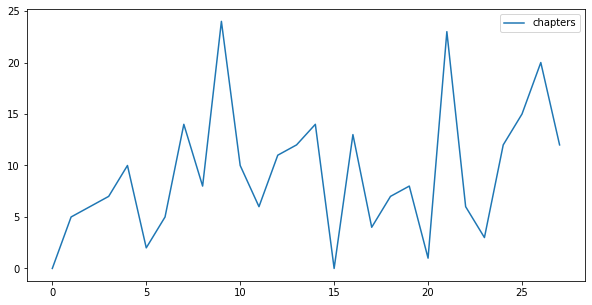

In [14]:
counts.plot()